# Epic Chat Chain by the Numbers

For this analysis, I pulled down the chat history back to February 2017. Parsed it out, and ran some stats. 

First, parse out the textfile data into a useable format

In [14]:
from datetime import datetime, timedelta

import pytz
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

DATE_FORMAT = '%a, %m/%d/%Y'
TIME_FORMAT = '%I:%M %p'
PACIFIC_TIME = pytz.timezone('US/Pacific')
TIME_ZERO = datetime(1900, 1, 1)

with open('[LINE] Chat in Epic Chat Chain.txt', 'r') as f:
    raw_text = f.read()
    
days = raw_text.split('\n\n')

columns = ['timestamp', 'name', 'text']
records = pd.DataFrame()

# days[0] is header

for day in days[1:]:
    lines = day.split('\n')
    first_value_line = 1
    
    try:
        date = datetime.strptime(lines[0], DATE_FORMAT)
    except ValueError:
        # '\n\n' was in text, carry on same day
        first_value_line = 0
    
    for line_int, line in enumerate(lines[first_value_line:]):
    
        try:
            time, name, text = tuple(line.split('\t'))
        except ValueError:
            # if '\n' in text, next line should append to previous
            records.loc[records.index.max(), 'text'] = records.loc[records.index.max(), 'text'] + ' ' + line

            # trying to add milliseconds in case the new line comes in after a double line... 
            # line_int + records.loc[records.index.max(), 'timestamp'].microsecond / 1000

        # adding line_int milliseconds to separate same-minute stamped records
        delta = datetime.strptime(time, TIME_FORMAT) - TIME_ZERO + timedelta(milliseconds=line_int)
        timestamp = PACIFIC_TIME.localize(date + delta)
        new_df = pd.DataFrame(dict(zip(columns, [timestamp, name, text])), index=[0])

        records = pd.concat([records, new_df], ignore_index=True)
    
records = records.set_index('timestamp')
records['timestamp'] = records.index

Let's take a look at who's the chattiest

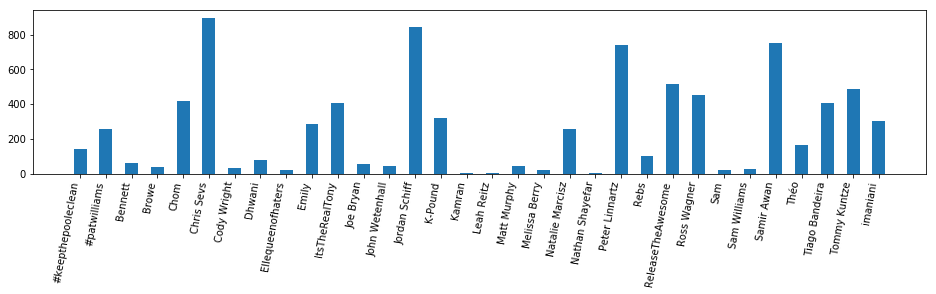

In [16]:
count = records.groupby('name').count()['text']  

fig = plt.figure(figsize=(16, 3))
ax = fig.add_subplot(111)

ax.bar(x=count.index, height=count.values, width=0.5)
ax.set_xticklabels(labels=count.index, rotation=80, ha='right')

fig.canvas.draw()

Who's the rooster?

In [56]:
# assume day starts at 5am
adjusted_times = records['timestamp'] + pd.Timedelta(-5, unit='h')

first_times = adjusted_times.groupby(records.index.date).min().values + pd.Timedelta(5, unit='h')

first_messages = records.loc[first_times]

first_count = first_messages.groupby('name')['timestamp'].count()


fig = plt.figure(figsize=(16, 3))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

width = 0.4



count.plot(kind='bar', color='red', ax=ax1, width=width, position=1)
first_count.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)



# ax1.bar(x=count.index, height=count.values, width=0.3)
ax1.set_xticklabels(labels=count.index, rotation=80, ha='right')

# ax2.bar(x=count.index, height=first_count.values, width=0.3)

fig.canvas.draw()

AttributeError: 'NoneType' object has no attribute 'seq'

AttributeError: 'NoneType' object has no attribute 'seq'

In [31]:
records[:100]

,name,text,timestamp
timestamp,,,
2017-02-19 19:18:00-08:00,Samir Awan,So happy she brought this to light. Insane the...,2017-02-19 19:18:00-08:00
2017-02-19 19:25:00.001000-08:00,Théo,[Sticker],2017-02-19 19:25:00.001000-08:00
2017-02-19 19:25:00.002000-08:00,Théo,What's wrong with some people,2017-02-19 19:25:00.002000-08:00
2017-02-19 20:32:00.003000-08:00,Peter Linnartz,We're all safe but this dude just nailed us co...,2017-02-19 20:32:00.003000-08:00
2017-02-19 20:32:00.004000-08:00,Peter Linnartz,"Super slippery, more cars than I've ever seen ...",2017-02-19 20:32:00.004000-08:00
2017-02-19 20:33:00.005000-08:00,Browe,Yikes. Glad everyone's ok,2017-02-19 20:33:00.005000-08:00
2017-02-19 20:36:00.006000-08:00,Emily,Holy shit so glad you're all ok,2017-02-19 20:36:00.006000-08:00
2017-02-19 20:46:00.007000-08:00,Chris Sevs,"I'm glad you led eith you're safe, just car da...",2017-02-19 20:46:00.007000-08:00
2017-02-19 20:48:00.008000-08:00,Chom,Glad your safe! Please continue to check in. H...,2017-02-19 20:48:00.008000-08:00
